<a href="https://colab.research.google.com/github/chidroop23/AI-ML/blob/main/Combined_Assignment_Chidroop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMBINED ML ASSIGNMENT**

# **Q1. KNN**

In [2]:
import pandas as pd

df = pd.read_csv("/nba_2013.csv")
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


**Checking for null values**

In [3]:
df.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [5]:
df.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [6]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098467,50.855639,132.751732,0.146218,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.401000,0.000000,3.000000,0.262626,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.437000,16.000000,48.000000,0.314607,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479000,68.000000,193.000000,0.366460,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [9]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='pos', ylabel='pts'>

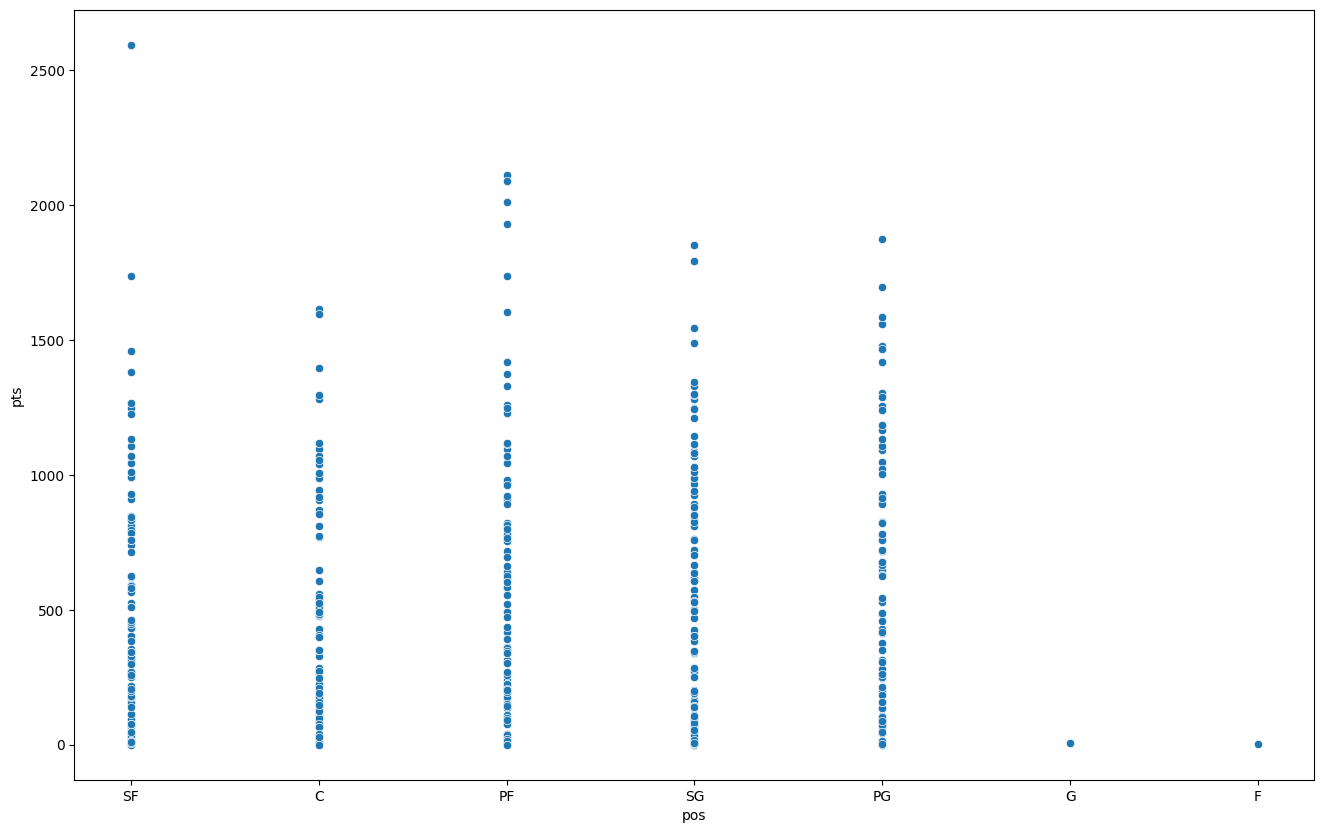

In [10]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='pos',y='pts',data=df)

In [7]:
df.drop(['season','season_end'],axis=1,inplace=True)

**Filling the non empty data**

In [4]:
df["fg."].fillna(df["fg."].mean(),inplace=True)
df["x2p."].fillna(df["x2p."].mean(),inplace=True)
df["efg."].fillna(df["efg."].mean(),inplace=True)
df["x3p."].fillna(df["x3p."].mean(),inplace=True)
df["ft."].fillna(df["ft."].mean(),inplace=True)

**Selecting only numeric columns**

In [11]:
distance_col = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
df_numeric = df[distance_col]

In [14]:
df_norm = df_numeric.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [13]:
#Categorical Columns
df_category = df[['player', 'bref_team_id']]

**Spliting the data**

In [16]:
df = pd.concat([df_category, df_norm], axis=1)

from sklearn.model_selection import train_test_split

# The columns that we will be making predictions with.
x_columns = df[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

# The column that we want to predict.
y_column = df["pts"]

x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

**KNN R**

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# check for increasing neighbour values to see which has the highest regression score

for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9145 for k_value: 1
Regression score is: 0.9464 for k_value: 2
Regression score is: 0.9548 for k_value: 3
Regression score is: 0.9594 for k_value: 4
Regression score is: 0.9583 for k_value: 5
Regression score is: 0.9579 for k_value: 6
Regression score is: 0.9579 for k_value: 7
Regression score is: 0.9609 for k_value: 8
Regression score is: 0.9576 for k_value: 9
Regression score is: 0.9557 for k_value: 10


In [18]:
from sklearn.metrics import mean_squared_error


In [19]:
knn = KNeighborsRegressor(n_neighbors = 8) #Since 8 has highest values
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0011143
Regression score is: 0.9609


In [20]:
Test_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})

Test_Predicted

,Actual Points,Predicted Points
0,0.168145,0.125723
1,0.276514,0.297243
2,0.422676,0.363189
3,0.007327,0.011088
4,0.381026,0.373939
...,...,...
140,0.426919,0.421664
141,0.013498,0.019379
142,0.312379,0.303943
143,0.306980,0.273766


## **Q2**
#  *Frequency of words in a  webpage using bs4*

In [21]:
!pip install requests

In [30]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import nltk

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html, "html5lib")

In [31]:

webpage_text = soup.get_text()

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
# Tokenize the text into words
words = nltk.word_tokenize(webpage_text)


In [36]:
# Filter out non-alphanumeric characters and convert words to lowercase
words = [word.lower() for word in words if word.isalnum()]


In [37]:
# Calculate the frequency of each word
word_frequency = nltk.FreqDist(words)


In [38]:
# Display the word frequencies
for word, frequency in word_frequency.items():
    print(f"{word}: {frequency}")


php: 143
hypertext: 1
preprocessor: 1
downloads: 47
documentation: 1
get: 1
involved: 1
help: 2
getting: 1
started: 1
introduction: 2
a: 26
simple: 1
tutorial: 1
language: 4
reference: 2
basic: 2
syntax: 1
types: 3
variables: 2
constants: 2
expressions: 1
operators: 1
control: 2
structures: 1
functions: 1
classes: 3
and: 47
objects: 1
namespaces: 1
enumerations: 1
errors: 1
exceptions: 2
fibers: 1
generators: 1
attributes: 2
references: 1
explained: 1
predefined: 4
interfaces: 1
context: 1
options: 1
parameters: 1
supported: 2
protocols: 1
wrappers: 1
security: 14
general: 1
considerations: 1
installed: 2
as: 3
cgi: 1
binary: 1
an: 5
apache: 1
module: 1
session: 2
filesystem: 1
database: 3
error: 1
reporting: 4
user: 2
submitted: 1
data: 1
hiding: 1
keeping: 1
current: 2
features: 7
http: 1
authentication: 2
with: 3
cookies: 1
sessions: 1
dealing: 1
xforms: 1
handling: 2
file: 10
uploads: 1
using: 2
remote: 1
files: 5
connection: 1
persistent: 1
connections: 1
command: 2
line: 2
usage:

## **Q3**
# *Comparing Image Quality*

In [39]:
from sklearn import cluster, datasets
from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


**To compress the raccoon grayscale image into 5 clusters, we use the K-Means clustering algorithm**

In [40]:
# Load the raw raccoon grayscale image
raw_image = misc.face(gray=True)

<ipython-input-40-5c6f1dac740e>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  raw_image = misc.face(gray=True)


In [41]:
# Flatten the image to create a data matrix
data = raw_image.reshape(-1, 1)


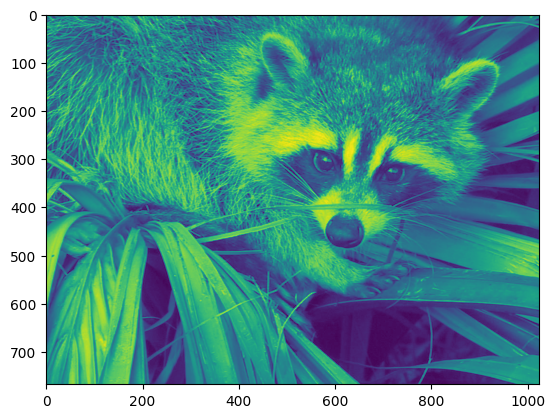

In [45]:
plt.imshow(raw_image)
plt.show()

In [46]:
from sklearn.cluster import KMeans

In [42]:
# Number of clusters (5 in this case)
num_clusters = 5

# Create a K-Means clustering model
kmeans = cluster.KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Replace each pixel value with its corresponding cluster center value
compressed_image = np.zeros_like(data)
for i in range(num_clusters):
   compressed_image[labels == i] = cluster_centers[i]
compressed_image = compressed_image.reshape(raw_image.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


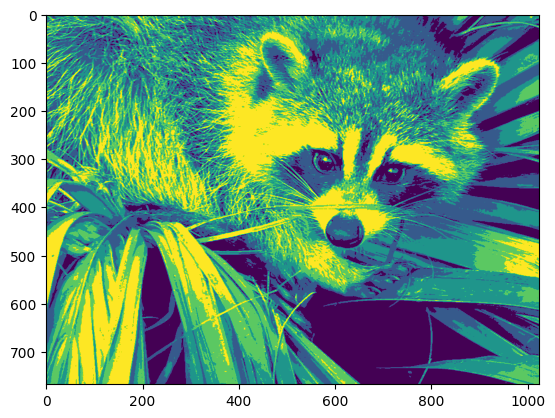

In [47]:
plt.imshow(compressed_image)
plt.show()

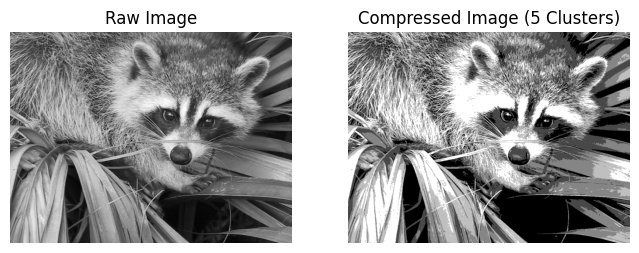

In [48]:
# Plot the raw image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(raw_image, cmap='gray')
plt.title('Raw Image')
plt.axis('off')

# Plot the compressed image
plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (5 Clusters)')
plt.axis('off')

plt.show()


# **Q4**
# *3-D IRIS DATA using PCA*

**Import the required Libraries**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [50]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Creating the PCA with 3 dimensions**

In [51]:
# Number of dimensions (3 in this case)
n_dimensions = 3

# Create a PCA model
pca = decomposition.PCA(n_components=n_dimensions)

# Fit the model to the data and transform the data into 3 dimensions
X_transformed = pca.fit_transform(X)

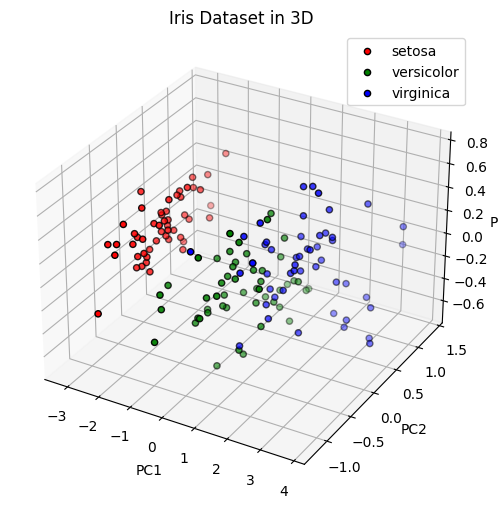

In [52]:
# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each class (assuming 3 classes in the iris dataset)
colors = ['r', 'g', 'b']

# Scatter plot for each class
for i in range(len(colors)):
    ax.scatter(
        X_transformed[y == i, 0],
        X_transformed[y == i, 1],
        X_transformed[y == i, 2],
        c=colors[i],
        label=iris.target_names[i],
        edgecolors='k',
    )

# Set labels for each axis
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Set a title and legend
ax.set_title('Iris Dataset in 3D')
ax.legend()

# Show the 3D plot
plt.show()


# **Q5**
# *ARIMA SHAMPOO SALES*

**Importing the libraries**

In [1]:
!pip install pmdarima

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame
import os

from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.arima.model import ARIMA

In [2]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

<ipython-input-3-9174b814a709>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<ipython-input-5-82962a50e1dc>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv("/shampoo.csv",header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


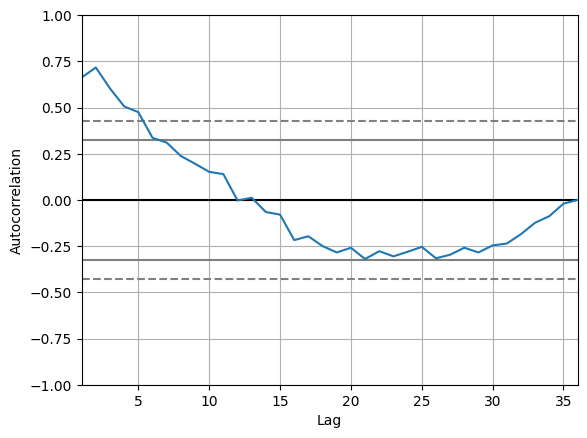

In [5]:
df1 = pd.read_csv("/shampoo.csv",header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(df1)
pyplot.show()

In [6]:
df1.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

**Fitting the data**

In [8]:
model = ARIMA(df1, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Mon, 24 Jul 2023   AIC                            408.969
Time:                        01:39:57   BIC                            418.301
Sample:                    01-01-1901   HQIC                           412.191
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


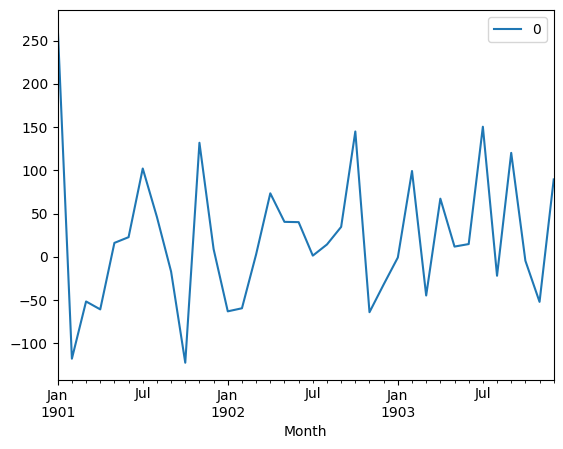

In [9]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

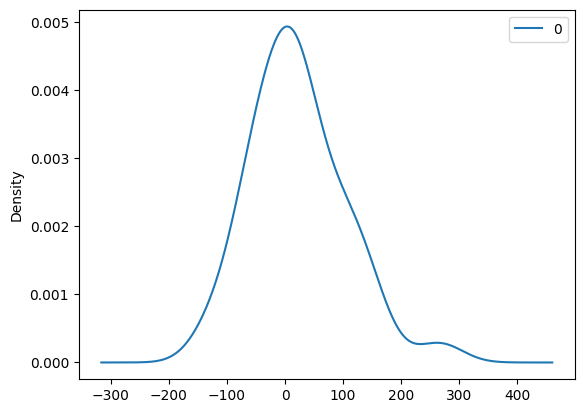

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [10]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

**ARIMA Model**

In [12]:
# split into train and test sets
X = df1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [13]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000


In [14]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 89.021


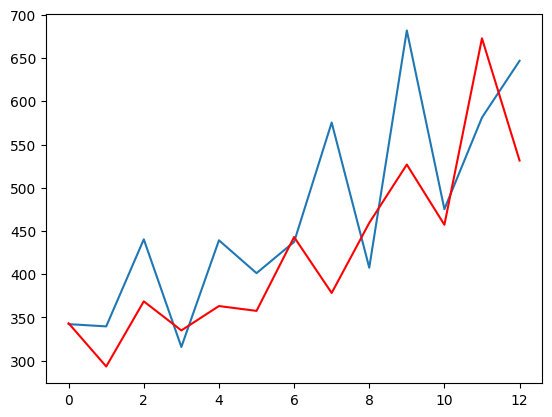

In [15]:
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# **References**

*1)https://github.com/siddharthalal/knn/blob/master/knn-predict-nba-player-points.ipynb*



*2) https://www.kaggle.com/code/lavonteadams/shampo-sales-arima/notebook*